<a href="https://colab.research.google.com/github/jcfediuk/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Gomez', 'Lopez', 'Martinez', 'Sanchez', 'Fernandez', 'Garcia', 'Torres']
nombres = ['Juan', 'Maria', 'Jose', 'Ana', 'Carlos', 'Laura', 'Pedro', 'Sofia', 'Diego', 'Valentina']
materias = ['Matemáticas', 'Lengua', 'Historia', 'Ciencias Sociales', 'Ciencias Naturales', 'Inglés', 'Educación Física', 'Música', 'Artes', 'Tecnología']

# Create a list to store the data
data = []

# Generate data for 100 rows
for _ in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  nro_dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)
  data.append([apellido, nombre, nro_dni, materia, nota1, nota2, nota3, faltas])

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Display the DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Perez,Maria,45064396,Ciencias Naturales,7,8,7,0
1,Rodriguez,Ana,29732701,Artes,7,4,3,7
2,Rodriguez,Carlos,94926722,Artes,9,1,7,9
3,Fernandez,Laura,45468120,Tecnología,5,5,10,3
4,Rodriguez,Valentina,26705816,Artes,3,6,3,4
...,...,...,...,...,...,...,...,...
95,Gomez,Ana,60139525,Lengua,8,3,8,17
96,Lopez,Sofia,21255710,Música,4,2,2,7
97,Gonzalez,Maria,79703627,Música,2,6,9,9
98,Gomez,Laura,63431022,Inglés,3,10,10,8


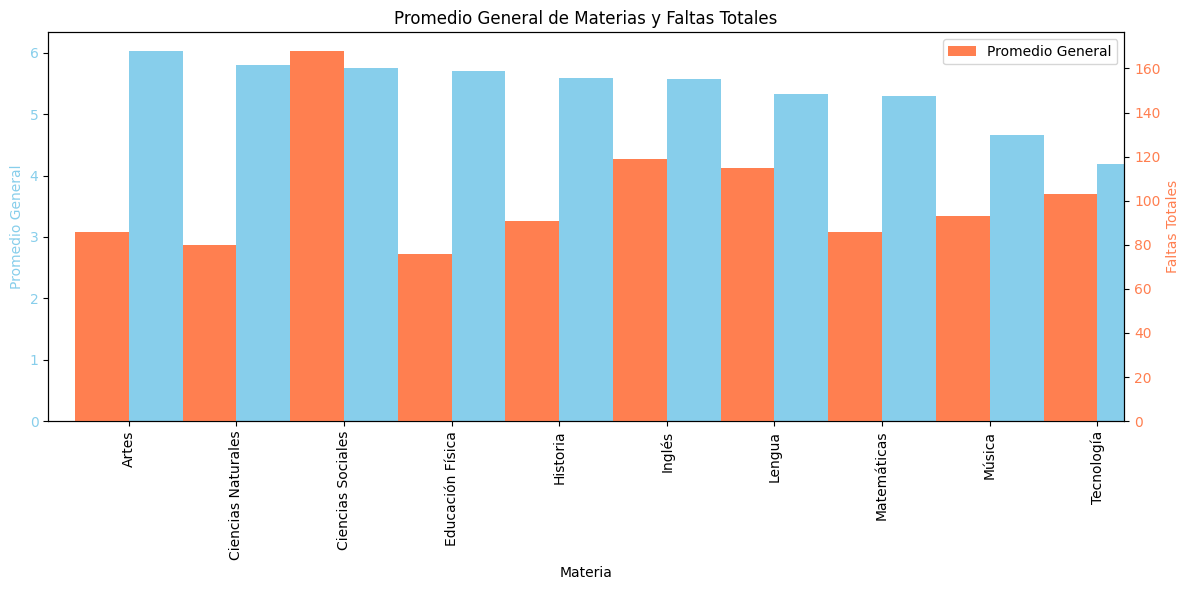

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average grade for each subject
average_grades = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas a clases'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades.plot(kind='bar', color='skyblue', ax=ax1, position=0)
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for absences
ax2 = ax1.twinx()
total_absences.plot(kind='bar', color='coral', ax=ax2, position=1)
ax2.set_ylabel('Faltas Totales', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Add labels and title
plt.title('Promedio General de Materias y Faltas Totales')
plt.xlabel('Materia')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ['Promedio General', 'Faltas Totales'], loc='upper right')


plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)